,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


C:\Users\vinic\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


103 total features after one-hot encoding.
Training set has 36177 samples.
Testing set has 9045 samples.
The accuracy value for the Naive prediction is of0.2478439697492371
The precision value for the Naive prediction is of1.0
The recall value for the Naive prediction is of1.0
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


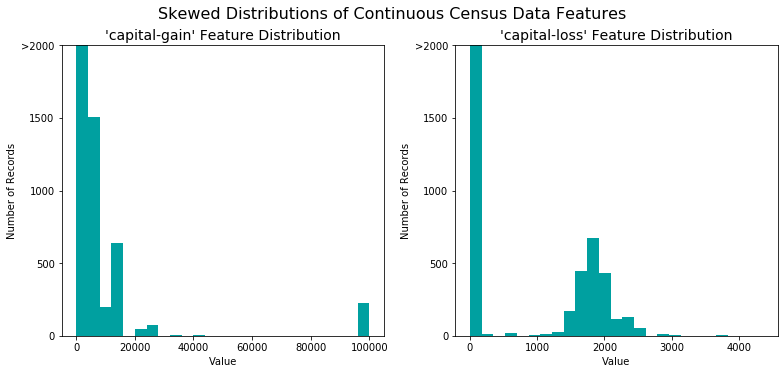

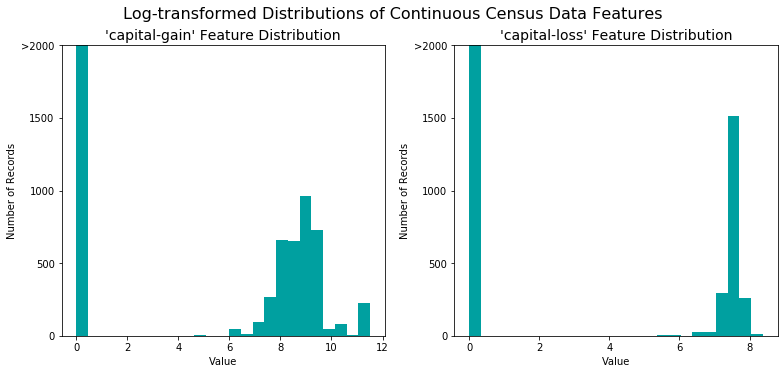

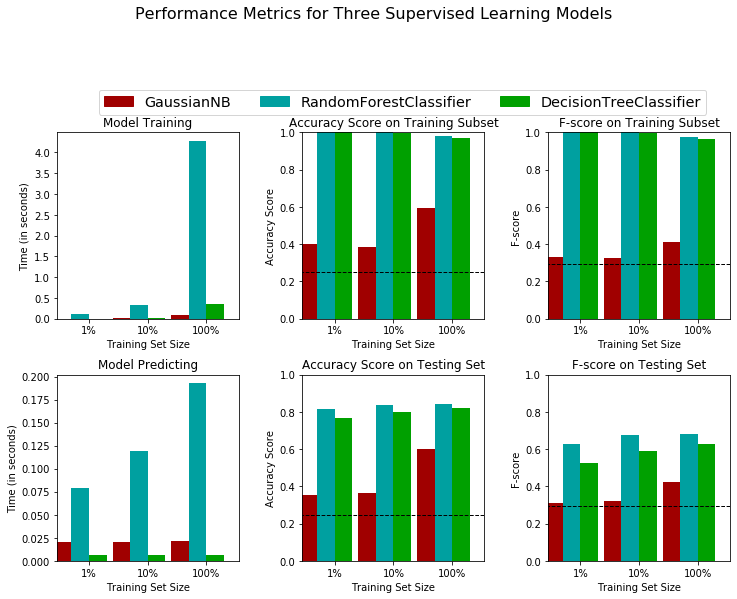

Unoptimized model
------
Accuracy score on testing data: 0.8417
F-score on testing data: 0.6797

Optimized Model
------
Final accuracy score on the testing data: 0.8606
Final F-score on the testing data: 0.7312


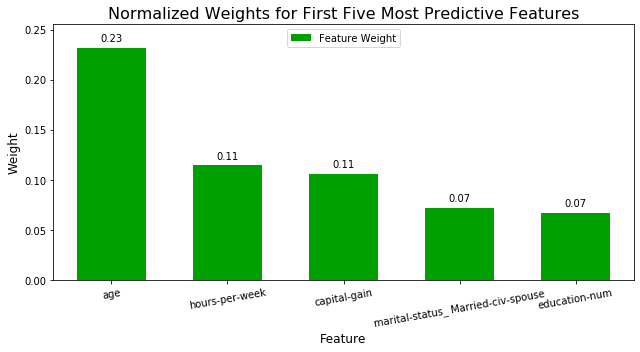

Final Model trained on full data
------
Accuracy on testing data: 0.8606
F-score on testing data: 0.7312

Final Model trained on reduced data
------
Accuracy on testing data: 0.8477
F-score on testing data: 0.6983


"\n   Question 8:\n   \n   Effects of Feature Selection:\n   How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same \n   scores when all features are used?\n   After analyzing the obtained results from the final model for full and reduced data:\n   \nFinal Model trained on full data\n------\nAccuracy on testing data: 0.8608\nF-score on testing data: 0.7319\n\nFinal Model trained on reduced data\n------\nAccuracy on testing data: 0.8465\nF-score on testing data: 0.6959\n\n    \n    It can be observed by comparing the results there a decrease on 1.66% on the accuracy value after switching from full to \n    reduced data, which isnt a substantial reduction, however for the F-score there was a decrease of 4.92% which is a more \n    significant reduction. Overall the model trained with reduced area showed reasonably good results. \n    \n    If training time was a factor, would you consider using the reduced data as your tra

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import supplementary visualization code visuals.py
#import visuals as vs
import visuals as vs
# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k =(data['income']=='>50K').sum()


# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = (data['income']=='<=50K').sum()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = ((data['income']=='>50K').sum())/(len(data))*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)
# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'>50K':1,'<=50K':0})
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
# Uncomment the following line to see the encoded feature names

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


# TODO: Calculate accuracy, precision and recall

accuracy = float(n_greater_50k) / (n_greater_50k + n_at_most_50k) 
precision = float(n_greater_50k)/(n_greater_50k)
recall = float(n_greater_50k)/(n_greater_50k)

print('The accuracy value for the Naive prediction is of {}'.format(accuracy))
print('The precision value for the Naive prediction is of {}'.format(precision))
print('The recall value for the Naive prediction is of {}'.format(recall))
# TODO: Calculate F-score using the formula above for beta = 0.5
fscore = (precision+(0.5**2)) * (accuracy) / ( (0.5**2) * accuracy + recall)
'''
    Question 1:
    
    Naive Predictor Performance:
    
    According to the naive predictor results, it is clear that it doesn't do a good job regarding the prediction, 
    since it only claims that people who make more than 50K are suitable donors, and ignore all other information that could 
    provide a more substantiable analysis on a donor identification. Since only 27,78% of all records make 
    more than 50K, than its easy to assume a low level for the accuracy of this model, at my calculations I obtained an 
    accuracy score of 0.2478 and an F_score of 0.2917 for the Naive predictor which are very low.
    
    '''   
# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

'''
    Question 2:
    
    Model Application:
    
    Model:Gaussian Naive Bayes
    
    Strenghts: A simple yet efficient and reasonably fast training model, which works really well with multiple classifying data. 
    It works on conditional probability, which contemplates the probability of ocurrence of an event given the ocurrence of
    another event.
    
    Industry application:
    One application for this algorithm, is for SPAM and document classifiers, since this sort of classification encompasses multi 
    classifying atributes, such as words that can categorize a SPAM, companies who normally make use of this algorithm would be 
    Google (gmail), another potential usage for this model would be to identify ownership of a written work.
    
    Weaknesses
    Naive Bayes assumes that predictors values are independent from the values of other, which leads to class conditional
    independence.
    What makes this model a good candidate?
    Since this project possesses a dataset with many calssifying parameters, running a Naive Bayes would be na interesting 
    choice for a classifier, also it is realtively fast and easy to run this model.
    
    References:
    https://medium.com/secure-and-private-ai-math-blogging-competition/spam-detection-and-filtering-with-naive-bayes-algorithm-f6c2ac181174
    https://emerj.com/ai-sector-overviews/machine-learning-algorithms-for-business-applications-complete-guide/
    https://www.saedsayad.com/naive_bayesian.htm
    
    Model:Decision tree
    Strenghts: relatively easy and fast to run, works well with numerical and categorical data (one-hot-encoding data) and are 
    highly scalable. Work by using a 'statement' structure which can classify the data and split it in smaller sets.
    
    Industry application:
    This model is very useful for situations regarding predictions of people choices, such as preferences regarding shows, music
    and movies, as well as political and economical preferences. It is used at the banking industry, in order to build decision
    trees to decide bank loans for clientes, as well as by content streaming services.
    
    Weaknesses:
    Are prone to overfitting the data they are assigned to, thus memorizing it, and doing a porro job out of other newer data
    that might be added.
    
    What makes this model a good candidate?
    in this project, it is necessary to identify suitable donors for Charity, which may evolve the wilingness of a person to 
    donate, it would be interesting to implement a model that can perform a predictive analysis on their behaviour which may 
    be based on their personal data (age, marital status, gender), also due to this dataset having a good amount of data which 
    can be interpreted as categorical, numerical it should fit this model perfectly.
    
    References: 
    https://medium.com/@nikitashetty_74927/identifying-risky-bank-loans-using-c5-0-decision-trees-by-brett-lantz-e903d220af3a
    https://emerj.com/ai-sector-overviews/machine-learning-algorithms-for-business-applications-complete-guide/
    
    Model:Ensemble (RandomForestClassifier)
    Strenghts: this model representes a form to train decision trees, by splitting the datasets into smallers sets, and using them
    at multiple decisionTrees (weak learners), this model enhances the usage of a Decision Tree, and makes its results more 
    accurate. RandomForest run time tend to be very fast, they can also handle missing and unbalanced data as well.
    
    Industry application:
    RandomForest help boost the accuracy of DecisionTrees, therefore they are also used for recommndations services, as well as banking
    sectors and even medical industry, in order to identify the patient sickness by analyzing its medical record.
    Weaknessess:
    They are prone to underfitting.
    
    What makes this model a good candidate?
    Ensemble methods can enhance the predictability effect of a decision forest, since we are trying to also understand what 
    parameters would be the most important ones, it would be interesting to run RamdomForest to enhance the effects of a 
    DecisionTree.
    
    References:
    https://blog.citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics
    https://medium.com/@aravanshad/gradient-boosting-versus-random-forest-cfa3fa8f0d80
    https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706
    '''   

# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
    
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
  

    # TODO: Calculate the total prediction time
    results['pred_time'] =end - start
         
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
  
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
    
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5) 
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results
# TODO: Import the three supervised learning models from sklearn

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state=10)
clf_C = DecisionTreeClassifier(random_state=2)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(float((len(y_train)*0.1)))
samples_1 = int(float((len(y_train)*0.01)))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

accuracy = float(n_greater_50k) / (n_greater_50k + n_at_most_50k) 
fscore = (precision+(0.5**2)) * (accuracy) / ( (0.5**2) * accuracy + recall)
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)
'''
    Question 3:
    
    Choosing the Best Model:
   
    metrics - F score on the testing when 100% of the training data is used
    According to the metrics obtained from the initial model evaluation graphs, RnadomForest and Decisiontree presented really good
    performances for 1% and 10% of the training data and Gaussian NB performed poorly in comparison with them, however for 100%
    of the training data RandomForest presented a better performance than DecisionTree, which makes RandomForest the better 
    classifier. 
    
    prediction/training time
    Regarding the prediction training time, RandomForest took longer to run in comparison to other 2 models, 
    however the amount of time it took can't be considered too much as it took aproximately 0,175 seconds to predict and 4 
    seconds to train 100% of the training data, which is perfectly tolerable.
    the algorithm's suitability for the data
    Overall RandomForest algorithm presented a better performance them the other 2, therefore it should be considered the most
    suitable choice for identifying the eligible donors.
    
    '''  
'''
    Question 4:
    
    Describing the Model in Layman's Terms:
    
    
    A RandomForest is a model that combines the predictions made by assembling multiple DecisionTrees into a single model,
    in order to reduce the variance of the results obtained from the Decisiontrees, as individual results predicted by them
    might be inacurate, however by combining those predictions, we get closer to creating an average for them. Its very much
    like brainstorming opinions and experiences from multiple people, this way it is possible to get a better utilization of
    the knowledge and reducing the limitations of knowledge for each person, thus creating an average of the predictions, which
    considerably reduces the margin of error. With this mdoel it will be possible to make better use of all the data at the
    census dataset.

    '''   

# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
 
# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=5)
 
# TODO: Create the parameters list you wish to tune
parameters = [{'min_samples_split' : [2,3,6,12],
'bootstrap' : [True, False],
'min_samples_leaf' : [1,3,5,7]
}]
 
# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

 
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
 
# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)
 
# Get the estimator
best_clf = grid_fit.best_estimator_
 
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
 
# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

'''
    Question 5:
    
    Final model evaluation:
    
    According to the results obtained from the model tuning:
    
Unoptimized model
------
Accuracy score on testing data: 0.8387
F-score on testing data: 0.6736

Optimized Model
------
Final accuracy score on the testing data: 0.8621
Final F-score on the testing data: 0.7352

Comparison: Naive Model
------
Accuracy score: 0.2478
F-score: 0.2917

    Comparing the results, it is possible to observe that there was a significant improvement on the accuracy score and the 
    f-score values if compared to the naive predictor performed earlier, also there was a small improvement from the scores 
    when using an optmized model, however it is noteworthy that the f-score results were not the best possible, 
    and could be improved, therefore it is possible to conclude that more training would be necessary to indentify exactly 
    which model would be the best.

    '''  
'''
    Question 6:
    
    Relevance of atributes: 
    According to my personal analysis, two important factors to determine a potential donor are his economical income and his 
    education, therefore I ranked the following parameters:
   
   -Capital Gain
   
   -Capital loss
   
   -Education level 
  
   -Education num
   
   -Marital Status
   
   Capital Gain has to do with the individual economic income, therefore it would be a crucial parameter for the identification
   of a potential donor, Capital Loss has a similar importance, as it is also realted to the individual economic income, 
   Educational level and num have to do with the individual education, which significantly impacts in his wilingness to donate and
   lastly I have selected Marital Status as a last parameter, as it could inlfuence in the amount of homely expenses an 
   individual would have, therefore influencing in his capability of donating.

'''
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
 
# TODO: Train the supervised model on the training set
model = RandomForestClassifier().fit(X_train, y_train)
 
# TODO: Extract the feature importances
importances = model.feature_importances_
 
# Plot
vs.feature_plot(importances, X_train, y_train)
'''
    Question 7: 
    
    Extracting feature importance: 
    According to the results obtained the five most importante parameters are:
    
    -Age
    
    -Hours per week
    
    -Capital gain
    
    -Marital Status
    
    -Education num
    
    How do these five features compare to the five features you discussed in Question 6?
    Comparing the results with my original prediction, they had 3 parameters in common, the other 2 being age and working hours.
    Age probably influences in the level of maturity of a person, working hours must influence in the level of economical 
    income too.
    
    If you were close to the same answer, how does this visualization confirm your thoughts?
    
    By estimating 3 correct parameters, the results conclude that economical income and education level influence greatly in 
    the probability of na individual being a donor. 


'''
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

'''
   Question 8:
   
   Effects of Feature Selection:
   How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same 
   scores when all features are used?
   After analyzing the obtained results from the final model for full and reduced data:
   
Final Model trained on full data
------
Accuracy on testing data: 0.8621
F-score on testing data: 0.7352

Final Model trained on reduced data
------
Accuracy on testing data: 0.8461
F-score on testing data: 0.6945

    
    It can be observed by comparing the results there a decrease on 1.66% on the accuracy value after switching from full to 
    reduced data, which isnt a substantial reduction, however for the F-score there was a decrease of 4.92% which is a more 
    significant reduction. Overall the model trained with reduced area showed reasonably good results. 
    
    If training time was a factor, would you consider using the reduced data as your training set?
    
    If time training was an issue I would consider the usage of the reduced data.


    '''  

